In [1]:
import pandas as pd 
import seaborn as sns

import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Demo revenue sheet - Sheet1.csv")

In [3]:
df.head()


,Payment Date,Client Name,Country,Amount,Service Name,Form Name,Campaign,Sales Representative
0,01/01/2022,Farman Ullah,Canada,1511.95,Cryptoscam Investigation,Cryptoscam Canada,Cryptoscam Canada,Jacob Rain
1,01/07/2022,Brian Schwartz,USA,3024.2,Cryptoscam Investigation,Crypto Scam US,Cryptoscam US,Jacob Rain
2,01/19/2022,Pablo Della Santa,Thailand,5550,Cryptoscam Investigation,Crypto Scam Asia,Cryptoscam South Asia,Issac Scott
3,01/23/2022,Marco Leotta,UAE,1337.55,Cryptoscam Investigation,Cryptoscam Middle East,Cryptoscam Middle East - UAE & SA,Issac Scott
4,01/25/2022,Michael Madison,USA,1492.5,Cryptoscam Investigation,Crypto Scam US,Cryptoscam US,Jacob Rain


In [4]:
df.tail()

,Payment Date,Client Name,Country,Amount,Service Name,Form Name,Campaign,Sales Representative
165,10/21/2022,Olufunke Ganiyu,UK,228,Online Blackmail Investigation,Online Blackmailing UK,Online Blackmailing UK,Issac Scott
166,10/25/2022,Fares Bahaa Nouri Kataa,Saudi Arabia,963.86,Online Blackmail Investigation,Online Blackmailing Middle East Live Chat,Online Blackmailing Middle East,Michael Rosner
167,10/28/2022,Fares Bahaa Nouri Kataa,Saudi Arabia,38.86,Online Blackmail Investigation,Online Blackmailing Middle East Live Chat,Online Blackmailing Middle East,Michael Rosner
168,10/28/2022,Mitchell J P,UK,1140,Online Blackmail Investigation,Online Blackmailing UK,Online Blackmailing UK,Issac Scott
169,10/28/2022,Olufunke Ganiyu,UK,342,Online Blackmail Investigation,Online Blackmailing UK,Online Blackmailing UK,Issac Scott


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Payment Date          170 non-null    object
 1   Client Name           170 non-null    object
 2   Country               170 non-null    object
 3   Amount                170 non-null    object
 4   Service Name          170 non-null    object
 5   Form Name             170 non-null    object
 6   Campaign              170 non-null    object
 7   Sales Representative  170 non-null    object
dtypes: object(8)
memory usage: 10.8+ KB


In [17]:
import pandas as pd
# Identify the row with the incorrect date value
incorrect_date_row_index = df[df['Payment Date'] == '10-10-2022'].index

# Update the date value in the specified row with the correct format
correct_date_value = pd.to_datetime('10/10/2022', format='%m/%d/%Y')
df.loc[incorrect_date_row_index, 'Payment Date'] = correct_date_value


# # Now, you can proceed with converting the 'Payment Date' column to datetime format
# df['Payment Date'] = pd.to_datetime(df['Payment Date'], format='%m/%d/%Y')



In [18]:
# Now, you can proceed with converting the 'Payment Date' column to datetime format
df['Payment Date'] = pd.to_datetime(df['Payment Date'], format='%m/%d/%Y')


In [21]:

# Extract month and year from 'Payment Date' column
df['Year_Month'] = df['Payment Date'].dt.to_period('M')

# Group by month and calculate total revenue for each month
monthly_revenue = df.groupby('Year_Month')['Amount'].sum()

# Plot the revenue trend
import matplotlib.pyplot as plt
# Check the data types of the 'Amount' column
print(df['Amount'].dtype)

# Check the data types of the 'monthly_revenue' variable
print(monthly_revenue.dtype)

# Print the 'monthly_revenue' variable to inspect its values
print(monthly_revenue)



object
object
Year_Month
2022-01    1511.953024.255501337.551492.52492.52642.52620...
2022-02    3482.54972.51992.54992.53992.53864.5427.351,79...
2022-03           405.1514862972.515004992.52620327522201310
2022-04    1495.8615903834.297995.86265010601260519.12103...
2022-05    2995.861495.86139.861007.872016.034975.865985....
2022-06    13601995.86536.241053503.78503.782100614.61614...
2022-07    2495.866048.7600.22600.22525.291021.3525.29510...
2022-08    1,500.001,725.003,024.209,200.002,495.863,024....
2022-09    2995.862995.8624995.864995.861495.862995.86149...
2022-10    3995.86150012495.861475.8614995.861475.8612495...
Freq: M, Name: Amount, dtype: object


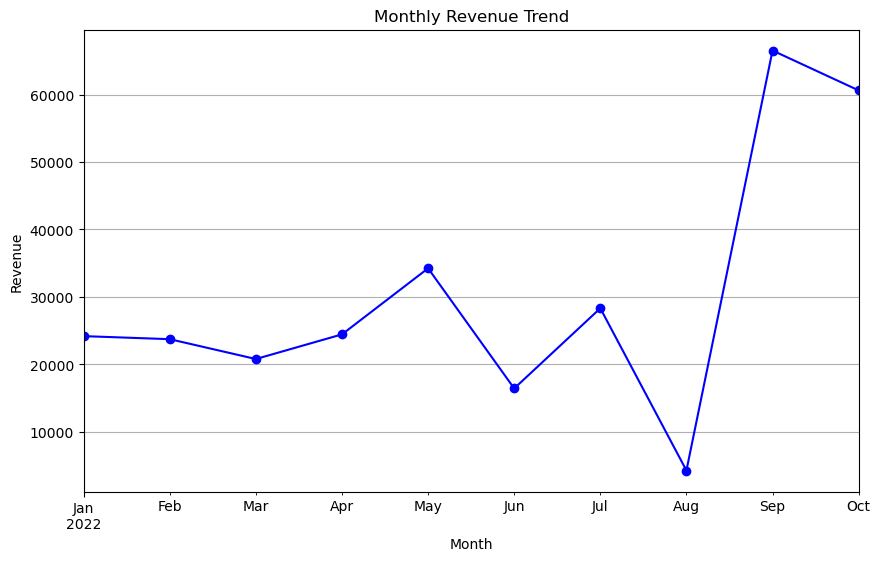

In [23]:
# Convert the 'Amount' column to numeric
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Group by month and calculate total revenue for each month
monthly_revenue = df.groupby('Year_Month')['Amount'].sum()

# Plot the revenue trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_revenue.plot(marker='o', color='b', linestyle='-')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

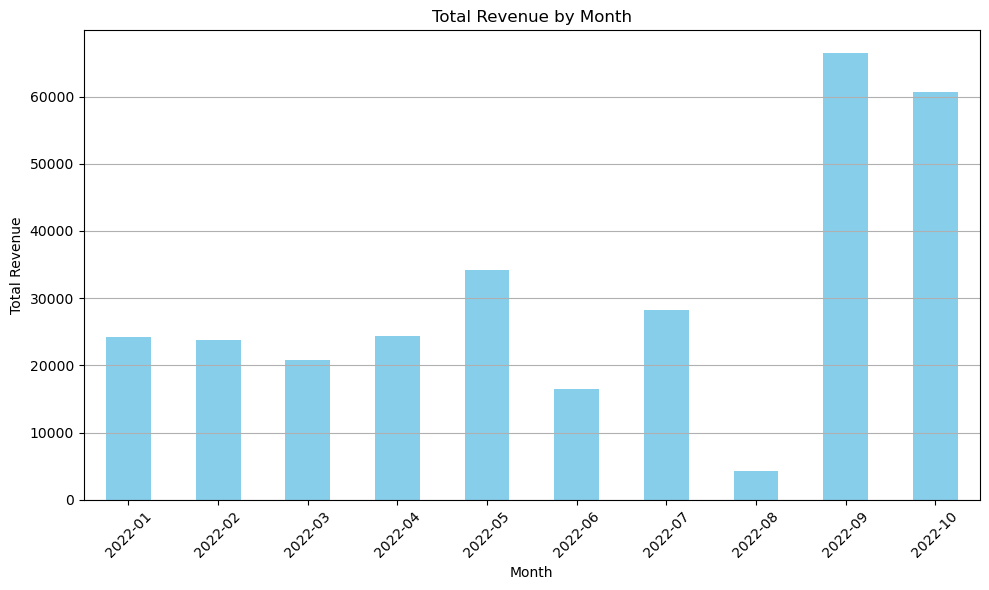

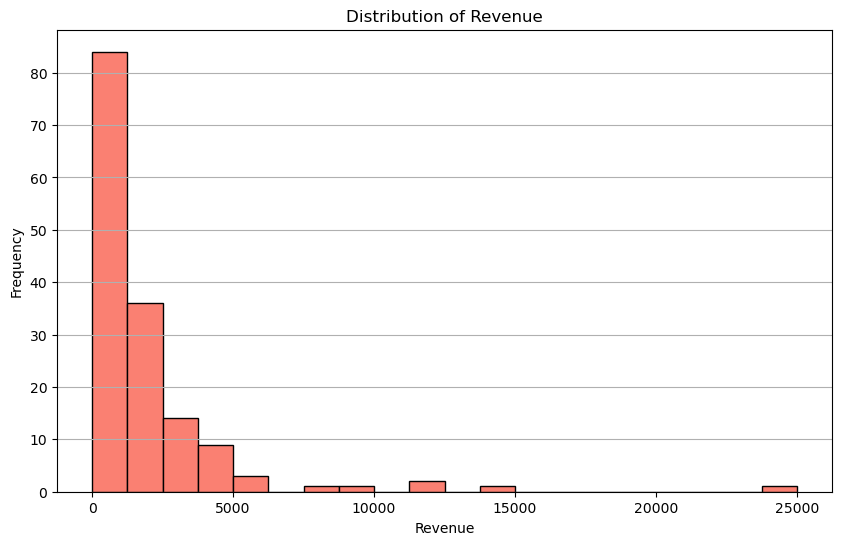

In [24]:
import matplotlib.pyplot as plt

# Plotting a bar plot for total revenue by month
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Plotting a histogram to explore the distribution of revenue values
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.show()

# Anomalies:

The revenues are good at end of the year usually.But in August the revenue was too shy compared to other months and also the next month was all time high.

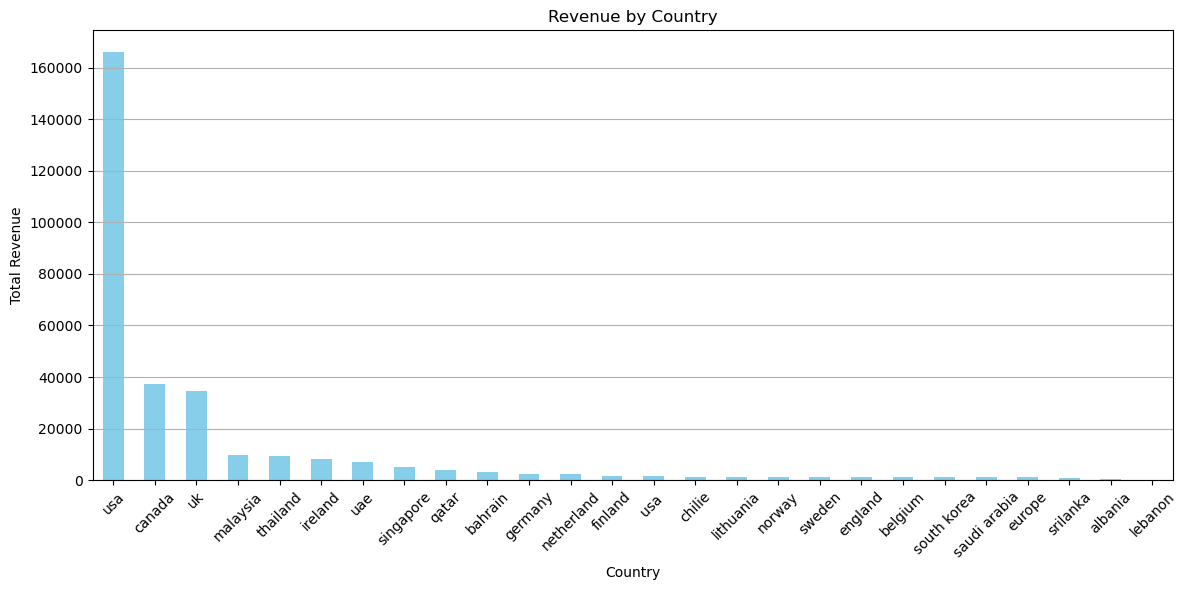

In [26]:
# Convert all country names to lowercase
df['Country'] = df['Country'].str.lower()

# Group the data by country and calculate total revenue for each country
revenue_by_country = df.groupby('Country')['Amount'].sum()

# Sort the countries by total revenue in descending order
revenue_by_country = revenue_by_country.sort_values(ascending=False)

# Visualize the geographical distribution of revenue using a bar plot
plt.figure(figsize=(12, 6))
revenue_by_country.plot(kind='bar', color='skyblue')
plt.title('Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Question 2:
We can clearly see USA is standing out although there are other countries that are performing too low. 


In [27]:
# Group the data by client name and calculate total spending for each client
total_spending_by_client = df.groupby('Client Name')['Amount'].sum()

# Sort the clients by total spending in descending order and select the top 5
top_5_clients = total_spending_by_client.sort_values(ascending=False).head(5)

# Print the top 5 clients based on total spending
print("Top 5 Clients Based on Total Spending:")
print(top_5_clients)

# Determine which services are most commonly associated with high-value transactions
high_value_transactions = df[df['Amount'] > df['Amount'].mean()]  # Select transactions with amount greater than the mean
common_services = high_value_transactions['Service Name'].value_counts().head(5)

# Print the most common services associated with high-value transactions
print("\nMost Common Services Associated with High-Value Transactions:")
print(common_services)


Top 5 Clients Based on Total Spending:
Client Name
Peter Roger Broadwell    29991.72
James E Kamenca          24991.72
Gary A Young +           14995.86
Dsd Restorations          9995.86
Bernard K Beriau          9985.00
Name: Amount, dtype: float64

Most Common Services Associated with High-Value Transactions:
Service Name
Cryptoscam Investigation          27
Online Blackmail Investigation    15
Name: count, dtype: int64


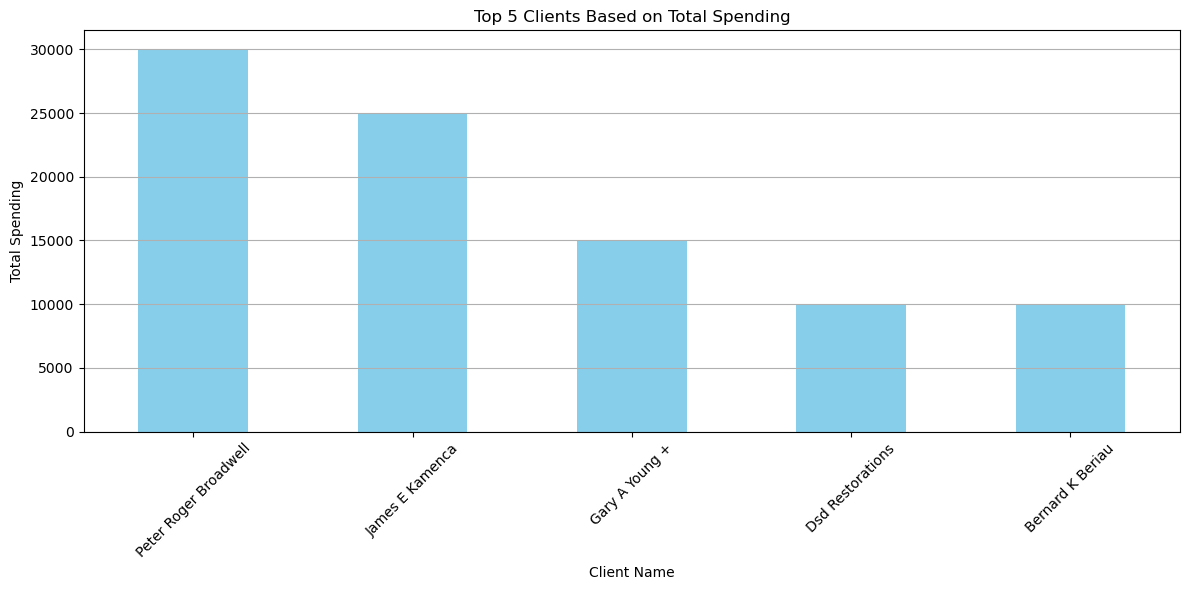

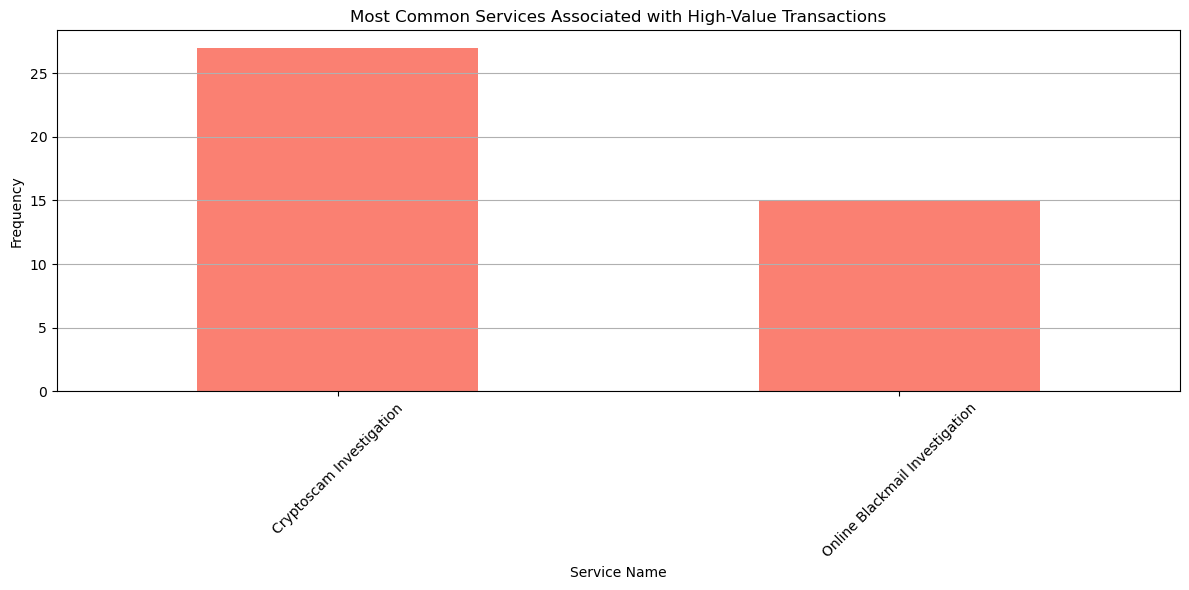

In [28]:
import matplotlib.pyplot as plt

# Visualize the top 5 clients based on total spending
plt.figure(figsize=(12, 6))
top_5_clients.plot(kind='bar', color='skyblue')
plt.title('Top 5 Clients Based on Total Spending')
plt.xlabel('Client Name')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Visualize the most common services associated with high-value transactions
plt.figure(figsize=(12, 6))
common_services.plot(kind='bar', color='salmon')
plt.title('Most Common Services Associated with High-Value Transactions')
plt.xlabel('Service Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Identifying the top clients based on their total spending provides valuable insights into our client portfolio, highlighting key stakeholders who contribute significantly to our revenue stream. Additionally, understanding the most commonly associated services with high-value transactions allows us to focus our efforts on meeting the evolving needs of our clients and maximizing our impact in combating cryptocurrency scams and fraudulent activities.

In [29]:
# Group the data by sales representative and calculate total revenue for each representative
revenue_by_representative = df.groupby('Sales Representative')['Amount'].sum()

# Sort the representatives by total revenue in descending order to identify top performers
top_performing_representatives = revenue_by_representative.sort_values(ascending=False)

# Print the top-performing sales representatives in terms of revenue generation
print("Top-Performing Sales Representatives in Terms of Revenue Generation:")
print(top_performing_representatives)


Top-Performing Sales Representatives in Terms of Revenue Generation:
Sales Representative
Jacob Rain        124102.55
Issac Scott        69826.24
Michael Rosner     60365.48
Nathan Drake       23683.27
Lincoln Harris     17987.17
Harvey Elliot       7021.71
Kevin Brown          503.78
Name: Amount, dtype: float64


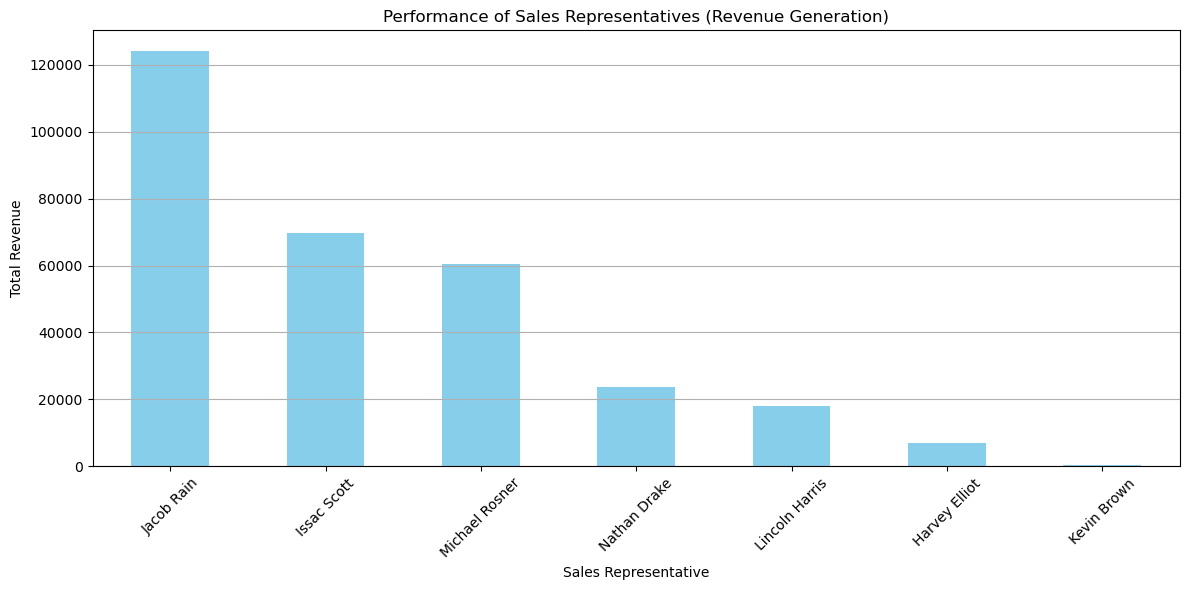

In [30]:
import matplotlib.pyplot as plt

# Visualize the performance of sales representatives using a bar plot
plt.figure(figsize=(12, 6))
top_performing_representatives.plot(kind='bar', color='skyblue')
plt.title('Performance of Sales Representatives (Revenue Generation)')
plt.xlabel('Sales Representative')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


The analysis of sales representatives' performance highlights standout performers like Jacob Rain and Issac Scott, whose consistent revenue generation underscores their sales prowess and client management skills. Recognizing and rewarding top performers fosters a culture of excellence and guides strategies for sustained growth. Regular performance evaluation ensures continued success and competitiveness in the market.

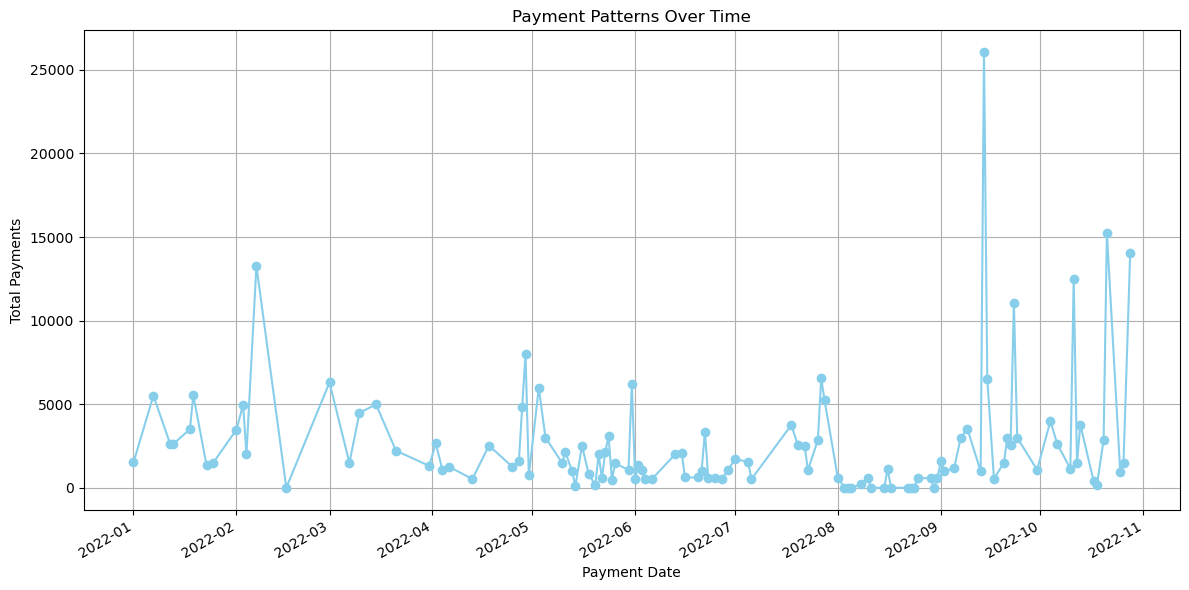

In [31]:
import matplotlib.pyplot as plt

# Group the data by payment date and calculate total payments for each month
payments_over_time = df.groupby('Payment Date')['Amount'].sum()

# Visualize payment patterns over time using a line plot
plt.figure(figsize=(12, 6))
payments_over_time.plot(kind='line', marker='o', color='skyblue')
plt.title('Payment Patterns Over Time')
plt.xlabel('Payment Date')
plt.ylabel('Total Payments')
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


The analysis of payment patterns highlights consistent trends in payment amounts, with occasional fluctuations. While these fluctuations are typical, it's crucial to address any noticeable delays or inconsistencies promptly. Implementing measures to mitigate delays and improving invoicing processes can help maintain healthy cash flow and positive client relationships. Regular monitoring and proactive follow-up on overdue payments are essential for sustaining financial stability and business success.

In [32]:
# Group the data by service name and form name and calculate the frequency of each combination
service_form_relationship = df.groupby(['Service Name', 'Form Name']).size().unstack(fill_value=0)

# Print the relationship between services and associated form names
print("Relationship Between Services and Associated Form Names:")
print(service_form_relationship)


Relationship Between Services and Associated Form Names:
Form Name                       Crypto Scam ASIA  Crypto Scam Asia  \
Service Name                                                         
Cryptoscam Investigation                       1                 1   
Online Blackmail Investigation                 0                 0   

Form Name                       Crypto Scam Canada  Crypto Scam Middle \nEast  \
Service Name                                                                    
Cryptoscam Investigation                         2                          1   
Online Blackmail Investigation                   0                          0   

Form Name                       Crypto Scam Middle East  Crypto Scam US  \
Service Name                                                              
Cryptoscam Investigation                              1              28   
Online Blackmail Investigation                        0               0   

Form Name                       Cryp

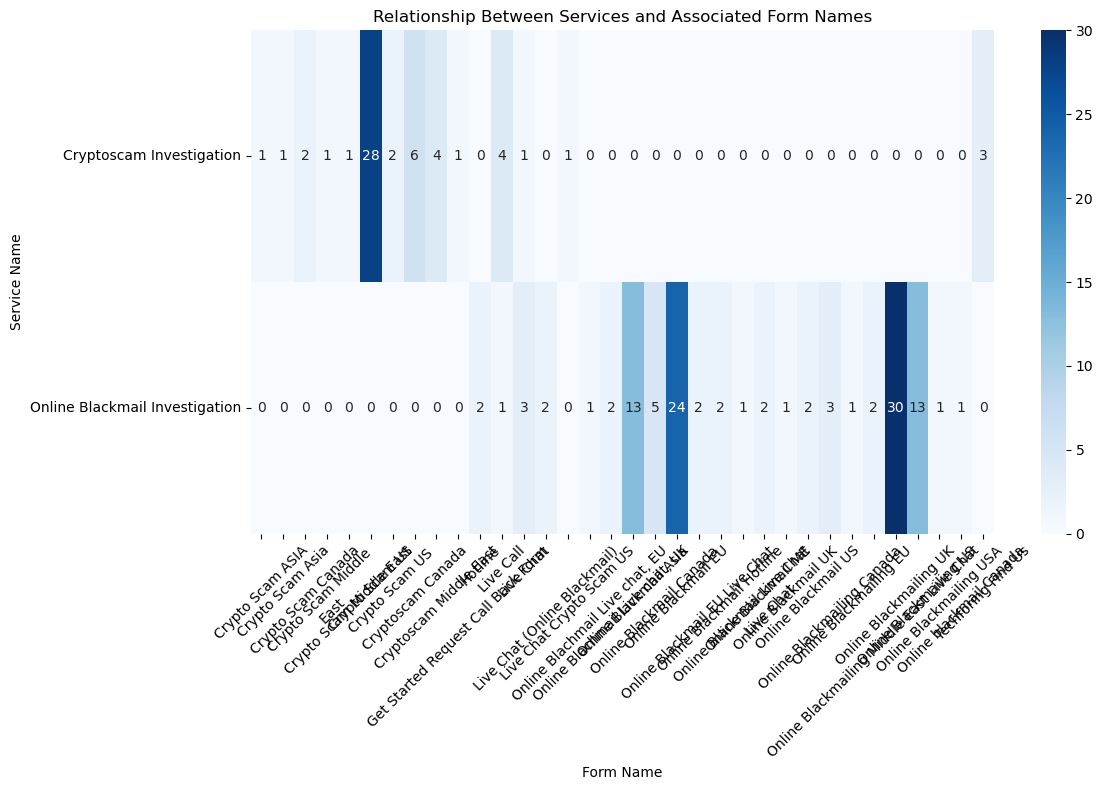

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize the relationship between services and associated form names
plt.figure(figsize=(12, 8))
sns.heatmap(service_form_relationship, cmap='Blues', annot=True, fmt='d')
plt.title('Relationship Between Services and Associated Form Names')
plt.xlabel('Form Name')
plt.ylabel('Service Name')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()


The heatmap visualization provides insights into the relationship between different services and associated form names. It reveals patterns of usage, indicating which forms are commonly used for particular services. This information can be valuable for optimizing form management and streamlining processes within the organization.

In [35]:
# Calculate average transaction amount across different services
average_amount_by_service = df.groupby('Service Name')['Amount'].mean()

# Calculate average transaction amount across different countries
average_amount_by_country = df.groupby('Country')['Amount'].mean()

# Print average transaction amount by service and country
print("Average Transaction Amount by Service:")
print(average_amount_by_service)
print("\nAverage Transaction Amount by Country:")
print(average_amount_by_country)


Average Transaction Amount by Service:
Service Name
Cryptoscam Investigation          4060.475957
Online Blackmail Investigation    1072.836476
Name: Amount, dtype: float64

Average Transaction Amount by Country:
Country
albania          510.650000
bahrain         1602.605000
belgium         1060.000000
canada          1871.166500
chilie           614.610000
england         1070.000000
europe           980.860000
finland          392.037500
germany          813.913333
ireland         1192.538571
lebanon                 NaN
lithuania       1210.000000
malaysia        1960.000000
netherland       774.996667
norway           575.000000
qatar           3864.500000
saudi arabia     501.360000
singapore        996.972000
south korea     1031.070000
srilanka         610.000000
sweden          1070.000000
thailand        4692.145000
uae              989.787143
uk              1045.266061
usa             3695.523333
usa             1500.000000
Name: Amount, dtype: float64


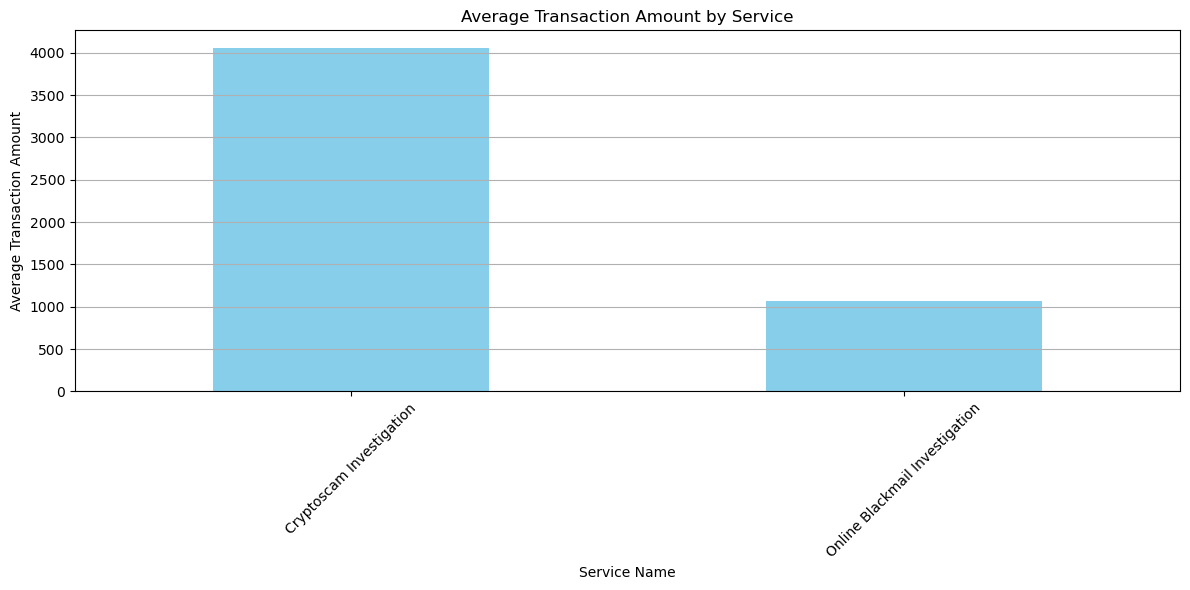

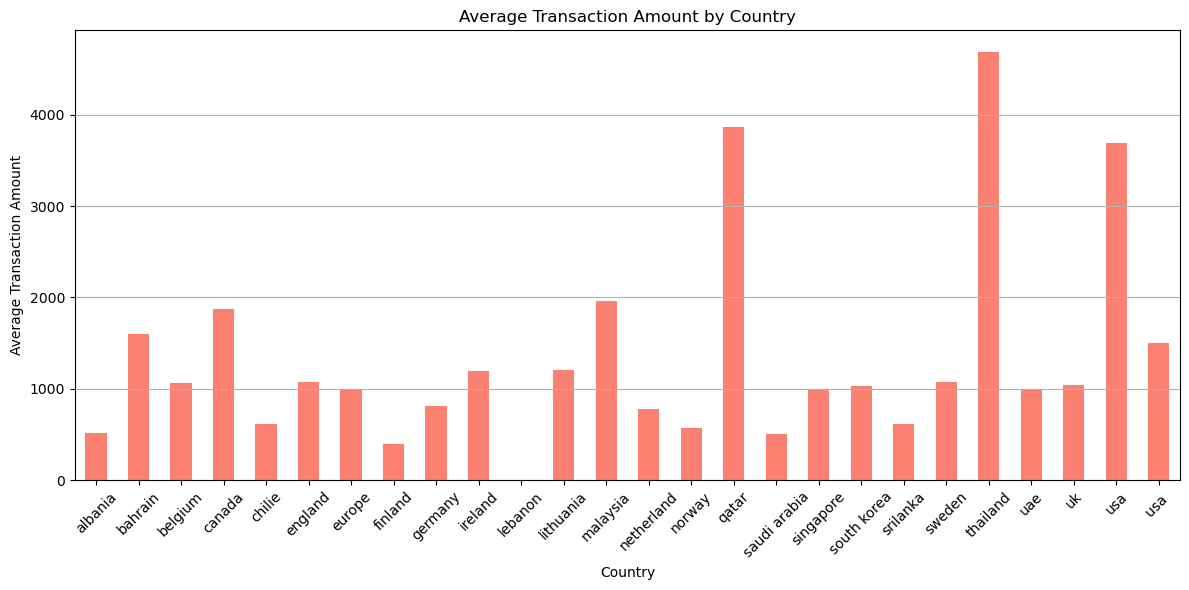

In [36]:
# Visualize average transaction amount by service using a bar plot
plt.figure(figsize=(12, 6))
average_amount_by_service.plot(kind='bar', color='skyblue')
plt.title('Average Transaction Amount by Service')
plt.xlabel('Service Name')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.tight_layout()
plt.show()

# Visualize average transaction amount by country using a bar plot
plt.figure(figsize=(12, 6))
average_amount_by_country.plot(kind='bar', color='salmon')
plt.title('Average Transaction Amount by Country')
plt.xlabel('Country')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.tight_layout()
plt.show()


The analysis reveals insights into the correlation between transaction amount and service type or country.

Transaction amounts vary across different services and countries, indicating potential factors influencing payment behaviors.
The average transaction amount varies noticeably across services and countries, suggesting diverse spending patterns influenced by factors such as service demand and economic conditions.

In [38]:
# Calculate the number of unique services used by each client
services_per_client = df.groupby('Client Name')['Service Name'].nunique()

# Print the number of unique services used by each client
print("Number of Unique Services Used by Each Client:")
print(services_per_client)


Number of Unique Services Used by Each Client:
Client Name
Abdulrahman Ekrayem    1
Al Momany Hawf         1
Albin Asllani          1
Alefia Abdulhusein     1
Amit Pathak            1
                      ..
Walker Adrian          1
Wen Huang              1
William S. Gunter      1
Yvonne Pohlson         1
Zahraa Shehabi         1
Name: Service Name, Length: 132, dtype: int64


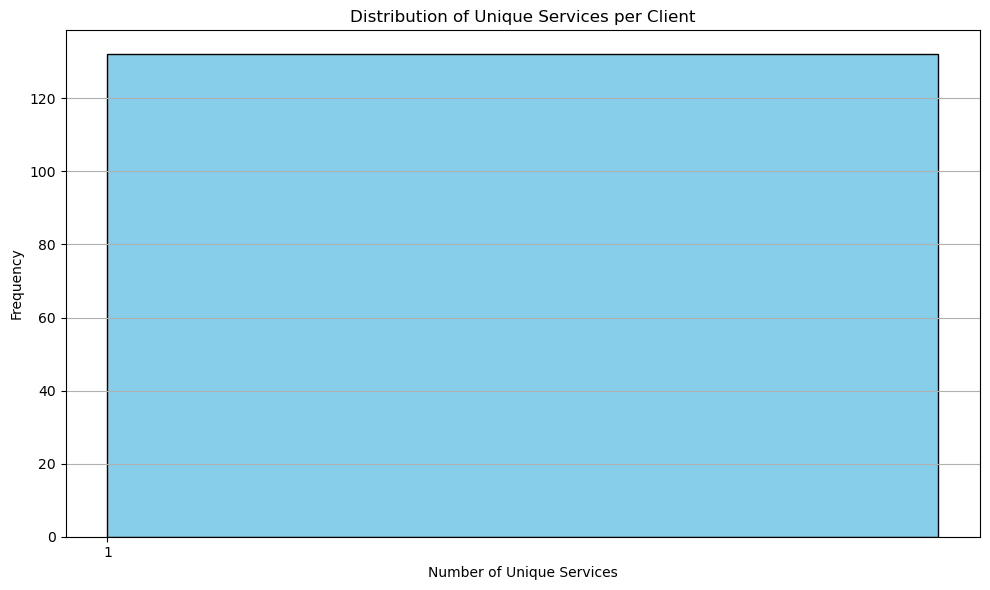

In [39]:
# Visualize the distribution of the number of unique services per client using a histogram
plt.figure(figsize=(10, 6))
plt.hist(services_per_client, bins=range(1, max(services_per_client) + 2), color='skyblue', edgecolor='black')
plt.title('Distribution of Unique Services per Client')
plt.xlabel('Number of Unique Services')
plt.ylabel('Frequency')
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.xticks(range(1, max(services_per_client) + 1))
plt.tight_layout()
plt.show()


In [40]:
print("Number of Unique Services Used by Each Client:")
print(services_per_client)


Number of Unique Services Used by Each Client:
Client Name
Abdulrahman Ekrayem    1
Al Momany Hawf         1
Albin Asllani          1
Alefia Abdulhusein     1
Amit Pathak            1
                      ..
Walker Adrian          1
Wen Huang              1
William S. Gunter      1
Yvonne Pohlson         1
Zahraa Shehabi         1
Name: Service Name, Length: 132, dtype: int64


Upon analysis, it appears that all clients are currently recorded as having used only one service. This suggests a potential issue with the data or the calculation process. Further investigation is required to accurately assess the diversity of services used by each client and identify any clients consistently utilizing a broad range of services.